
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [3]:
import numpy as np
import pandas as pd

In [4]:
medical_df = pd.read_csv('../../data/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Можна поділити людей на вікові групи і дослідити значення колонки `charges` для кожної з них. У старших людей скоріш за все більш імовірне виникнення проблем із здоров'ям і вони можуть мати більшу фінансову стабільність ніж молоді люди, тому вартість для ниих може бути вищою.


2.  Курці мають більше ризиків для здоров'я, тому для них `charges` може бути вище  
3.  Можна дослідити значеня по різним регіонам, в різних районах можуть мешкати люди з різним рівнем забезпечення. Також можливо що різні регіони мають різну екологічну ситуацію, що також має вплив на здоров'я
4.  Можна дослідити значення `charges` для різного індекса маси тіла, люди з надмірною вагою можуть бути більш схильні до проблем із здоров'ям. Також якшо людина, наприклад, і палить, і має надмірну вагу, у неї ще вищі шанси виникнення зпхворювань


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:

fig = px.histogram(medical_df,
                   x='charges',
                   color='region',
                   marginal='box',
                   title='Розподіл "charges" в залежності від регіона'
                   )
fig.update_layout(bargap=0.1)
fig.show()

З отриманого графіку можна побачити, що більшість людей сплачує менше 12k і серед них прблизно однакова кількість людей з різних регіонів, проте явно видно, що більшість людей що сплачують більшу суму від 36 до 50 проживає в регіоні `southeast` 

In [7]:

fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Розподіл "charges" в залежності від статі'

                   )
fig.update_layout(bargap=0.1)
fig.show()

З графіку видно, що медичниі збори до 14к сплачує приблизно однакова кількість чоловіків і жінок, навіть трохи більше жінок, проте явно видно що зі збільшенням суми від 20к більшість клєнтів є чоловіками. Це може бути пов1язано з тим, що чоловіки частіше мають вищі доходи, ніж жінки.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [8]:

fig = px.histogram(medical_df,
                   x='smoker',
                   color='region')
fig.show()

З гпафіку видно, що серед не курців приблищно однакова кількість людей з усіх регіонів.
Проте, серед людей які палять, помвтно більше людей з регіону `southeast`.

In [9]:

fig = px.histogram(medical_df,
                   x='smoker',
                   color='children')
fig.show()

На графіку як серед курців, так і серед тих хто не палить найбільша кількість людей у яких зовсім немає дітей, найменша кількість людей які мають 4 або 5 дітей, але це, скоріш за все, пов'язано з тим що загалом у датасеті більше людей без дітей і дуже мало тих у кого їх 4-5. Загалом люди з різною кіьлкість дітей приблизно однаково поділяються для обох категорій куріння і виглядає ніби явного зв'яку між палінням і кількістю дітей немає.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [10]:
medical_df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [11]:
fig = px.violin(medical_df,
                x='charges',
                color='children'
               )
               
fig.update_traces(marker_size=5)
fig.show()

З графіку видно, що:


* люди, що мають 5 дітей всі платять менше 20к, 
* більшість тих у кого 4 дитини платять до 24к, 
* більшість з 3 дітьми пдатить до 37к, 
* більшість з 2 дітьми до 40, 
* більшість з однією дитиною до 31к 
* більшість без дітей платить до 30

Отже, загалом, люди що мають 2 та 3 дітей платять найбільші суми, проте, хоч більшість людей з однією дитиною та без дітей платить менше, на графіку ці групи мають набільшу кількість викидів і сплачують найвищі збори, що може бути зумаовлено іншими чинниками.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [12]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [13]:
def estimate_charges(age, w, b):
    return w * age + b

In [14]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

Лінія задається парамотрами `w` кута нахилу  та `b` зсуву по осі y. Спочатку спробуємо знайти правильний кут прирівнявши `b` поки що до 0

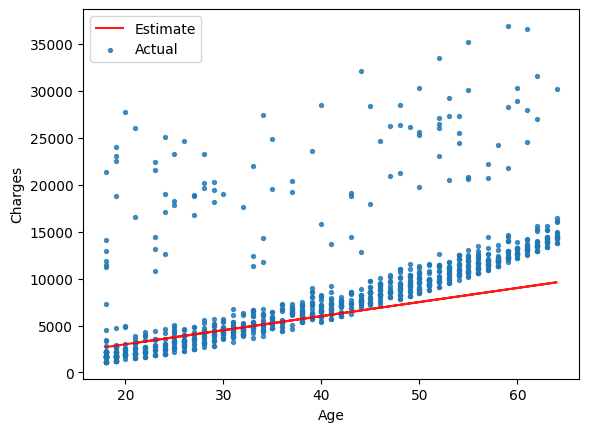

In [15]:
try_parameters(non_smoker_df, 150, 0)

Потрібно трохи збільшити кут нахилу лінії та можна тепер спробувати інше значення `b`

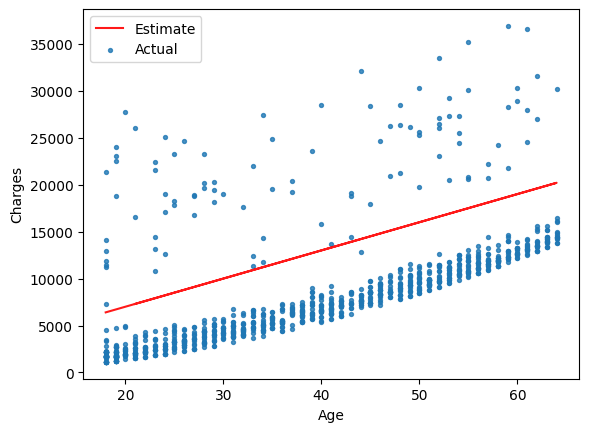

In [16]:
try_parameters(non_smoker_df, 300, 1000)

Отримана лінія приблизно відповідає напрямку залежності зборів від віку. Тепер порібно зсунути цю лінію по осі y вниз.

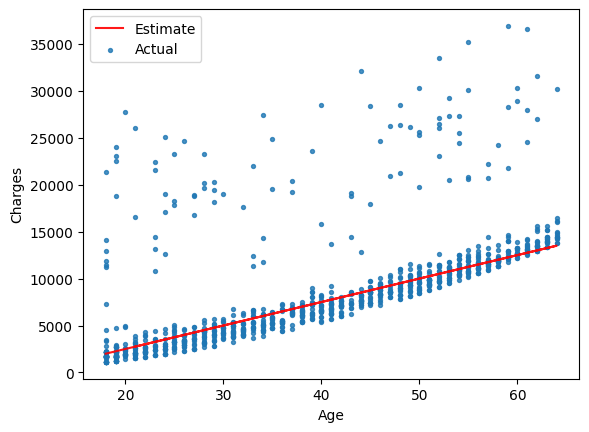

In [17]:
try_parameters(non_smoker_df, 250, -2500)


Отримана лінія з параметрами `w = 250` та `b = -2500` приблизно відповідає наявній залежності між змінними `charges` та `age`

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [18]:
def rmse(targets, prdictions):
    return np.sqrt(np.mean(np.square(targets - prdictions)))

In [19]:
w1, w2, w3 = 150, 300, 250
b1, b2, b3 = 0, 1000, -2500

In [26]:
targets = non_smoker_df['charges']
predictions = estimate_charges(non_smoker_df.age, w1, b1)
rmse(targets, predictions)

5553.927449482415

In [27]:
predictions = estimate_charges(non_smoker_df.age, w2, b2)
rmse(targets, predictions)

6414.638689603041

In [28]:
predictions = estimate_charges(non_smoker_df.age, w3, b3)
rmse(targets, predictions)

4793.904061890193

Мені вдалося досягти найнижчого значенн втрат 4793. Для досягнення результатів методом проб і помилок впринципі підходить стратегія яку я вже використала в попередньому завданні, де спочатку пробуються різні параметри для знаходження кута нахилу і потім різні параметри зсуву по осі у вже підігнаної пі днахил даних лінії.